In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import sys
import csv
from konlpy.tag import Kkma, Hannanum 
from eunjeon import Mecab
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from os import path
import os
from collections import Counter
from PIL import Image

In [4]:
def total_word_cloud(csv):
    tf = pd.read_csv(f"{csv}",index_col=0)
    text = tf['key']
#     text.split()
    sejong_map = np.array(Image.open('./Data/sejong_map.jpg'))
    sejong_logo = np.array(Image.open('./Data/sejong_logo.jpg'))
    noun_text = ''
    FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'
    for word in text:
        noun_text = noun_text + word
    # print(noun_text)
    wordcloud = WordCloud(max_font_size=40,max_words=2000,
                          font_path=FONT_PATH,mask=sejong_logo,background_color='white',
                          width=1200,height=800).generate("".join(noun_text))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

* 불필요한 단어를 삭제하는 단어삭제 함수 생성

In [5]:
def delkey(text):
    del(dictpos[text])
    sres = sorted(dictpos.items(), key=lambda x:x[1], reverse=True)
    return sres

In [5]:
a2015 = pd.read_csv('./Data/sejong_text_2015.csv')
a2016 = pd.read_csv('./Data/sejong_text_2016.csv')
a2017 = pd.read_csv('./Data/sejong_text_2017.csv')
a2018 = pd.read_csv('./Data/sejong_text_2018.csv')
a2019 = pd.read_csv('./Data/sejong_text_2019.csv')
a2020 = pd.read_csv('./Data/sejong_text_2020.csv')

df = pd.concat([a2015,a2016,a2017,a2018,a2019,a2020],axis=0)
df = df.reset_index(drop='index')

In [7]:
%%time

mecab = Mecab()
p_list = []
for i in range(len(df)):
    p = mecab.pos(str(df.iloc[i]))
    p_list.append(p)
    
p_list1 = sum(p_list,[])
# p_list1

Wall time: 46.4 s


In [8]:
dictpos={}
# check = ['NNG', 'NNP', 'NNB', 'NNM', 'VV', 'VA', 'VXV', 'VXA'] # kkma
check = ['NNG','NNP']

for w, pos in p_list1:
    if pos in check:
        if (w in dictpos.keys()):
            dictpos[w] += 1
        else:
            dictpos[w] = 1
dictpos

{'사진': 574,
 '연합뉴스': 800,
 '전국': 737,
 '아파트': 1462,
 '값': 193,
 '보합세': 5,
 '올해': 501,
 '머니': 573,
 '투데이': 582,
 '세종': 2724,
 '신현우': 17,
 '기자': 3059,
 '토지': 290,
 '건물': 72,
 '집합': 8,
 '기부': 7,
 '등본': 1,
 '종': 49,
 '추가': 143,
 '사이버': 140,
 '대학교': 152,
 '총장': 83,
 '김문현': 22,
 '시대': 83,
 '인생': 4,
 '준비': 18,
 '장년층': 4,
 '한겨레': 60,
 '증가': 235,
 '폭': 115,
 '사상': 34,
 '최대': 133,
 '과잉': 66,
 '분양': 1203,
 '금리': 240,
 '인상': 127,
 '우려': 81,
 '원인': 18,
 '서울': 2612,
 '강남구': 52,
 '대치동': 8,
 '마아': 3,
 '파트': 7,
 '전경': 153,
 '자료': 248,
 '동아일보': 117,
 '내년': 257,
 '대출': 360,
 '규제': 558,
 '순위': 96,
 '거주자': 19,
 '마감': 26,
 '기업': 156,
 '입사': 2,
 '시험': 7,
 '경쟁': 119,
 '신문': 314,
 '기원전': 1,
 '세기': 2,
 '이탈리아': 3,
 '반도': 1,
 '통일': 7,
 '막': 6,
 '세력': 28,
 '확장': 11,
 '로마': 1,
 '지중': 1,
 '겨울': 6,
 '비수기': 32,
 '美': 14,
 '공급': 348,
 '신규': 111,
 '곳': 289,
 '강화': 264,
 '영향': 124,
 '전문가': 107,
 '작년': 103,
 '호황': 34,
 '가능': 113,
 '전망': 134,
 '상가': 371,
 '오피스텔': 144,
 '충북': 141,
 '뉴스': 1244,
 '조영석': 3,
 '제천시': 2,
 '공정': 7

In [276]:
sres = sorted(dictpos.items(), key=lambda x:x[1], reverse=True)
sres

[('부동산', 3626),
 ('기자', 3059),
 ('세종', 2724),
 ('서울', 2612),
 ('종시', 1933),
 ('정부', 1622),
 ('주택', 1600),
 ('경제', 1521),
 ('시장', 1501),
 ('아파트', 1462),
 ('뉴스', 1244),
 ('분양', 1203),
 ('대책', 1050),
 ('지역', 894),
 ('국토', 857),
 ('연합뉴스', 800),
 ('전국', 737),
 ('장관', 613),
 ('발표', 592),
 ('투데이', 582),
 ('사진', 574),
 ('머니', 573),
 ('규제', 558),
 ('교통부', 521),
 ('상승', 516),
 ('거래', 511),
 ('투자', 508),
 ('수도', 502),
 ('올해', 501),
 ('도시', 494),
 ('가격', 484),
 ('동영상', 476),
 ('뉴시스', 460),
 ('투기', 460),
 ('기획', 454),
 ('정책', 449),
 ('한국', 446),
 ('부총리', 428),
 ('집값', 424),
 ('청약', 413),
 ('부', 411),
 ('행정', 397),
 ('최근', 391),
 ('조사', 385),
 ('과열', 381),
 ('상가', 371),
 ('대출', 360),
 ('경기', 357),
 ('공급', 348),
 ('앵커', 345),
 ('재정부', 341),
 ('수익', 334),
 ('아시아', 333),
 ('강남', 331),
 ('대전', 324),
 ('건설', 323),
 ('지난해', 318),
 ('매매', 315),
 ('신문', 314),
 ('생활', 309),
 ('국세청', 299),
 ('이전', 298),
 ('토지', 290),
 ('곳', 289),
 ('개발', 285),
 ('가구', 283),
 ('안정', 282),
 ('제공', 280),
 ('지방', 279),
 ('데일리', 2

In [10]:
delkey('매경')

[('부동산', 3626),
 ('기자', 3059),
 ('세종', 2724),
 ('서울', 2612),
 ('종시', 1933),
 ('정부', 1622),
 ('주택', 1600),
 ('경제', 1521),
 ('시장', 1501),
 ('아파트', 1462),
 ('뉴스', 1244),
 ('분양', 1203),
 ('대책', 1050),
 ('지역', 894),
 ('국토', 857),
 ('연합뉴스', 800),
 ('전국', 737),
 ('장관', 613),
 ('발표', 592),
 ('투데이', 582),
 ('사진', 574),
 ('머니', 573),
 ('규제', 558),
 ('교통부', 521),
 ('상승', 516),
 ('거래', 511),
 ('투자', 508),
 ('수도', 502),
 ('올해', 501),
 ('도시', 494),
 ('가격', 484),
 ('동영상', 476),
 ('뉴시스', 460),
 ('투기', 460),
 ('기획', 454),
 ('정책', 449),
 ('한국', 446),
 ('부총리', 428),
 ('집값', 424),
 ('청약', 413),
 ('부', 411),
 ('행정', 397),
 ('최근', 391),
 ('조사', 385),
 ('과열', 381),
 ('상가', 371),
 ('대출', 360),
 ('경기', 357),
 ('공급', 348),
 ('앵커', 345),
 ('재정부', 341),
 ('수익', 334),
 ('아시아', 333),
 ('강남', 331),
 ('대전', 324),
 ('건설', 323),
 ('지난해', 318),
 ('매매', 315),
 ('신문', 314),
 ('생활', 309),
 ('국세청', 299),
 ('이전', 298),
 ('토지', 290),
 ('곳', 289),
 ('개발', 285),
 ('가구', 283),
 ('안정', 282),
 ('제공', 280),
 ('지방', 279),
 ('데일리', 2

In [11]:
data = pd.DataFrame.from_dict(dictpos,orient='index').rename(columns={0:'counts'})
data = data.reset_index()
data.columns=['key','counts']
data['y'] = 'none'
# data

In [12]:
data1 = data.groupby(by='y',as_index=True).agg(lambda x : ','.join(x))
# data1

In [14]:
data1.to_csv('./Data/sejong_mecab.csv')

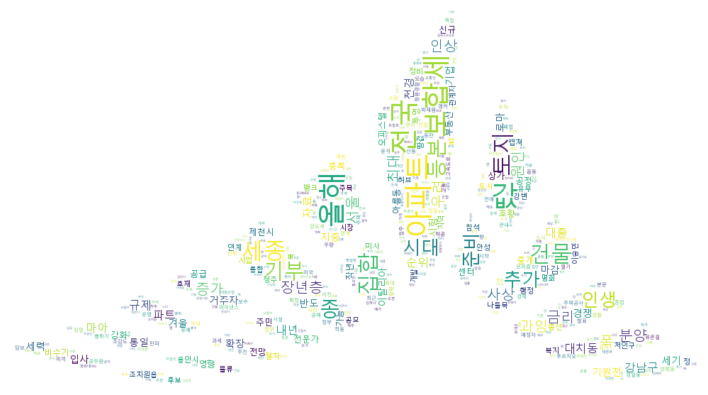

In [4]:
total_word_cloud('./Data/sejong_mecab.csv')